# 쿠키 티어(등급) 선정 && 히든 쿠키 예측

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import seaborn as sns
import copy

In [2]:
temp = pd.read_csv('oven_data_0710.csv')

# 쿠키간 유사도 계산

- 쿠키 타입 / 포지션
- 쿠키 개별 전투데이터
    - \+ 정규화

- k-means 클러스터링
- feature => 타입, 포지션, 전투 데이터

## Feature 설정

|      Idx     |     Type     |     Type_Val  |   Position   |   Pos_Val    |
|:------------:|:------------:|:-------------:|:------------:|:------------:|
| 1 | 돌격형 |7| 전방 |  10 |
| 2 | 방어형 |11| 중앙 | 20  |
| 3 | 마법형 |19| 후방 | 30  |
| 4 | 폭발형 |23| - | -  |
| 5 | 사격형 |29| - | -  |
| 6 | 침투형 |31| - | -  |
| 7 | 회복형 |41| - | -  |
| 8 | 지원형 |47| - |  - |

In [2]:
cook_ordinary_idx = {1:'연금술사맛쿠키', 2:'천사맛쿠키', 3:'아보카도맛쿠키', 4:'비트맛쿠키',
                    5:'블랙베리맛쿠키', 6:'용감한쿠키', 7:'풍선껌맛쿠키', 8:'당근맛쿠키', 9:'체리맛쿠키',
                    10:'칠리맛쿠키', 11:'클로버맛쿠키', 12:'커스타드3세맛쿠키', 13:'다크초코맛쿠키', 14:'탐험가맛쿠키',
                    15:'허브맛쿠키', 16:'정글전사쿠키', 17:'감초맛쿠키', 18:'마들렌맛쿠키', 19:'마법사맛쿠키',
                    20:'우유맛쿠키', 21:'민트초코맛쿠키', 22:'근육맛쿠키', 23:'용사맛쿠키', 24:'닌자맛쿠키',
                    25:'양파맛쿠키', 26:'팬케이크맛쿠키', 27:'독버섯맛쿠키', 28:'석류맛쿠키', 29:'공주맛쿠키',
                    30:'호밀맛쿠키', 31:'눈설탕맛쿠키', 32:'스파클링맛쿠키', 33:'딸기맛쿠키', 34:'자색고구마쿠키',
                    35:'뱀파이어맛쿠키', 36:'웨어울프맛쿠키', 37:'에스프레소맛쿠키', 38:'구미호맛쿠키', 39:'라떼맛쿠키',
                    40:'슈크림맛쿠키', 41:'아몬드맛쿠키', 42:'블랙레이즌맛쿠키', 43:'퓨어바닐라쿠키', 44:'딸기크레페맛쿠키',
                    45:'페스츄리맛쿠키', 46:'무화과맛쿠키', 47:'악마맛쿠키', 48:'벨벳케이크맛쿠키', 49:'바다요정쿠키', 50:'망고맛쿠키'}

In [4]:
cook_pos_type = {1:['폭발형', '중앙'], 2:['회복형', '후방'], 3:['방어형', '전방'], 4:['사격형', '후방'],
                    5:['마법형', '후방'], 6:['돌격형', '전방'], 7:['폭발형', '후방'], 8:['지원형', '중앙'], 9:['폭발형', '후방'],
                    10:['침투형', '중앙'], 11:['지원형', '후방'], 12:['회복형', '후방'], 13:['돌격형', '전방'], 14:['침투형', '중앙'],
                    15:['회복형', '후방'], 16:['사격형', '후방'], 17:['마법형', '중앙'], 18:['방어형', '전방'], 19:['마법형', '중앙'],
                    20:['방어형', '전방'], 21:['지원형', '후방'], 22:['돌격형', '전방'], 23:['방어형', '전방'], 24:['침투형', '중앙'],
                    25:['지원형', '중앙'], 26:['침투형', '후방'], 27:['폭발형', '중앙'], 28:['지원형', '후방'], 29:['돌격형', '전방'],
                    30:['사격형', '후방'], 31:['마법형', '중앙'], 32:['회복형', '후방'], 33:['방어형', '전방'], 34:['돌격형', '전방'],
                    35:['침투형', '후방'], 36:['돌격형', '전방'], 37:['마법형', '중앙'], 38:['돌격형', '전방'], 39:['마법형', '중앙'],
                    40:['지원형', '후방'], 41:['지원형', '후방'], 42:['침투형', '중앙'], 43:['회복형', '후방'], 44:['방어형', '전방'],
                    45:['사격형', '후방'], 46:['지원형', '중앙'], 47:['마법형', '중앙'], 48:['돌격형', '전방'], 49:['폭발형', '중앙'], 
                    50:['마법형', '중앙']}

In [5]:
aaa = {"돌격형":7, "방어형":11, "마법형":19, "폭발형":23, "사격형":29, "침투형":31, "회복형":41, "지원형":47}
bbb = {"전방":10, "중앙":20, "후방":30}

In [6]:
# 쿠키들 포스 타입 설정 부분
cal_all_pos_type = []

for i in range(50):
    type_k = cook_pos_type[i + 1][0]
    pos_k = cook_pos_type[i + 1][1]
    
    cal_all_pos_type.append(aaa[type_k] * bbb[pos_k])

In [7]:
# 쿠키들 포스타입 값 제대로 설정됐는지 확인
for i in range(50):
    type_k = cook_pos_type[i + 1][0]
    pos_k = cook_pos_type[i + 1][1]
    if (type_k == "침투형" and pos_k == "중앙") or (type_k == "마법형" and pos_k == "중앙"):
        print(cal_all_pos_type[i], end = " ")
        print(cook_ordinary_idx[i + 1])

620 칠리맛쿠키
620 탐험가맛쿠키
380 감초맛쿠키
380 마법사맛쿠키
620 닌자맛쿠키
380 눈설탕맛쿠키
380 에스프레소맛쿠키
380 라떼맛쿠키
620 블랙레이즌맛쿠키
380 악마맛쿠키
380 망고맛쿠키


## 유사도 분석에 필요한 데이터 가져오기

In [8]:
ck_idx = temp["COOKIE_IDX"]
gd = temp["GIVE_DMG"]
rd = temp["RCV_DMG"]
gh = temp["GIVE_HEAL"]
rh = temp["RCV_HEAL"]

ck_pd = pd.DataFrame(ck_idx)
gd_pd = pd.DataFrame(gd)
rd_pd = pd.DataFrame(rd)
gh_pd = pd.DataFrame(gh)
rh_pd = pd.DataFrame(rh)


sample1 = pd.merge(ck_pd, gd_pd, how = 'left', left_index = True, right_index = True)
sample2 = pd.merge(sample1, rd_pd, how = 'left', left_index = True, right_index = True)
sample3 = pd.merge(sample2, gh_pd, how = 'left', left_index = True, right_index = True)
cal_avg_result = pd.merge(sample3, rh_pd, how = 'left', left_index = True, right_index = True)


key_avg = ["COOKIE_IDX", "GIVE_DMG", "RCV_DMG", "GIVE_HEAL", "RCV_HEAL"]

In [9]:
cal_avg_result

,COOKIE_IDX,GIVE_DMG,RCV_DMG,GIVE_HEAL,RCV_HEAL
0,13,191031,232433,0,167060
1,39,341494,138963,0,134162
2,37,657258,136638,0,143187
3,43,0,193142,756343,181824
4,35,362265,149709,96504,226612
...,...,...,...,...,...
12457,13,476288,270971,0,18074
12458,37,1041346,152761,0,0
12459,17,100709,126602,0,0
12460,15,0,129951,18074,0


## 각 쿠키별로 전투 데이터 통합
- 데이터 내에 존재하는 오탈자로 인한 오류 방지를 위한 예외 처리 필수

In [10]:
saved = {}
to_count = {}


for i in range(50):
    saved[i + 1] = [0 for _ in range(4)]
    to_count[i + 1] = 0

    
for i in range(len(cal_avg_result)):
    battle_result = []
    for j in range(len(key_avg)):
        this_key = key_avg[j]
        try:
            cal_avg_result[this_key][i]
        except:
            continue
        
        if this_key == "COOKIE_IDX":
            key = cal_avg_result[this_key][i]
        else:
            if cal_avg_result[this_key][i] != -1:
                battle_result.append(cal_avg_result[this_key][i])
 
    try:
        to_count[key] += 1
    except:
        print("EXCEPT 1 :: index error in data set")

        
    for k in range(len(battle_result)):
        try:
            saved[key][k] += battle_result[k]
        except:
            print("EXCEPT 2 :: index error in data set")

EXCEPT 1 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 1 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 1 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 1 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 1 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set
EXCEPT 2 :: index error in data set


## 계산을 위해 각 쿠키들의 전투 데이터 평균 게산

In [14]:
final_avg_battle_result = {}
for i in range(50):
    if to_count[i + 1] != 0:
        final_avg_battle_result[i + 1] = [num / to_count[i + 1] for num in saved[i + 1]]

## 필요한 부분 추출

In [16]:
avg_to_list = []
for i in range(50):
    avg_to_list.append(final_avg_battle_result[i+1][:3])


xx = [a[0] for a in avg_to_list]
yy = [a[1] for a in avg_to_list]
zz = [a[2] for a in avg_to_list]


xn = {}
yn = {}
zn = {}

xx = []
yy = []
zz = []


for i in range(len(cook_ordinary_idx)):
    if to_count[i + 1] >= 20:
        xn[i + 1] = avg_to_list[i][0]
        yn[i + 1] = avg_to_list[i][1]
        zn[i + 1] = avg_to_list[i][2]
        
        xx.append(avg_to_list[i][0])
        yy.append(avg_to_list[i][1])
        zz.append(avg_to_list[i][2])

## 그래프와 K-Means 수행을 위한 데이터 분할

In [17]:
new_xx = [(x - np.mean(xx)) / np.std(xx) for x in xx]
new_yy = [(y - np.mean(yy)) / np.std(yy) for y in yy]
new_zz = [(z - np.mean(zz)) / np.std(zz) for z in zz]

In [18]:
new_avg = []
for i in range(len(new_xx)):
    newnew = [new_xx[i], new_yy[i], new_zz[i]]
    new_avg.append(newnew)

In [157]:
new_avg

[[-0.8026811503927046, -1.8036586242275003, -0.41312930909059054, 0],
 [-0.7821708185912406, -0.5689614454323945, -0.41312930909059054, 0],
 [-0.6367618041868889, -1.6624813928283848, -0.4111992898393416, 0],
 [-0.8301250374948133, -1.652597088795431, -0.2989653687094409, 0],
 [-0.10180157736677353, 1.607094121523829, -0.412825172757627, 1],
 [-0.8326163412396784, 0.42680891563621015, 1.8691890400173474, 2],
 [-0.5218699380360127, -1.4443259749410629, -0.4125981818978119, 0],
 [0.16515961214557712, -0.09427790284288642, -0.40700694151300815, 1],
 [-0.1882596292496286, 0.36130689081187195, -0.41312930909059054, 1],
 [-0.6408622963558074, 0.40232937580390854, -0.41312930909059054, 1],
 [-0.7643708985030128, -0.7045802671604321, 0.3929110490538503, 0],
 [-0.7517509665073281, 0.44803020675896366, 1.1449804082624762, 2],
 [0.9591693295187329, 0.1832297610184785, -0.4111431075727096, 1],
 [0.6646245000667236, 0.4825398510464069, 0.32949941589362847, 1],
 [-0.5931812616843326, -0.686012615543

## K-Means 수행

In [19]:
# 군집의 갯수 3
Kmean = KMeans(n_clusters=3)
Kmean.fit(new_avg)

KMeans(n_clusters=3)

In [20]:
# 군집의 중심 좌표
center_point_battle_result = Kmean.cluster_centers_
print(center_point_battle_result)

[[-0.5718627  -1.06407778 -0.30997684]
 [ 0.62875403  0.64104673 -0.34984851]
 [-0.79942801  0.62804641  2.32932457]]


In [21]:
# 데이터에 군집 레이블 값을 추가
result_by_sklearn = new_avg.copy()
for i in range(len(result_by_sklearn)):
    result_by_sklearn[i].append(Kmean.labels_[i])

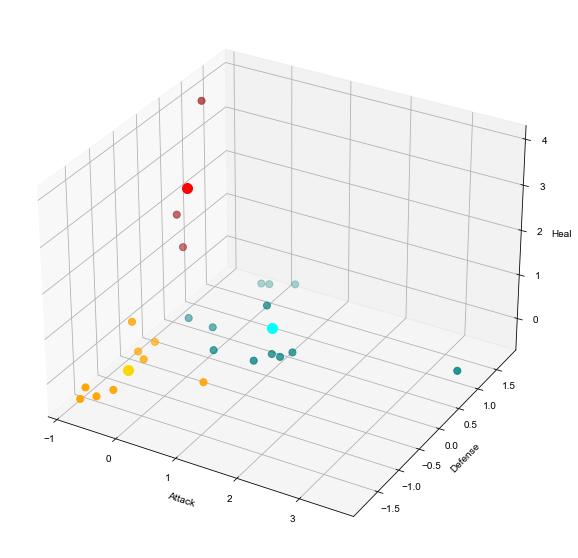

In [22]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")
ax.set_xlabel("Attack")
ax.set_ylabel("Defense")
ax.set_zlabel("Heal")

# np.where(condition, [x,y])
#                  condition_1.  , [ x  ,                y                             ]
col = np.where(Kmean.labels_ == 0, 'orange', np.where(Kmean.labels_ == 1, 'teal', 'brown'))
#                                                     condition_2.    , [  x  ,    y   ]

ax.scatter(new_xx, new_yy, new_zz, c = col, s = 50)
ax.scatter(center_point_battle_result[0][0], center_point_battle_result[0][1], center_point_battle_result[0][2], c = 'gold', marker='o', s= 100, cmap='Greens')
ax.scatter(center_point_battle_result[1][0], center_point_battle_result[1][1], center_point_battle_result[1][2], c = 'aqua', marker='o', s= 100, cmap='Greens')
ax.scatter(center_point_battle_result[2][0], center_point_battle_result[2][1], center_point_battle_result[2][2], c = 'red', marker='o', s= 100, cmap='Greens')
plt.show()

## 데이터 접근을 위한 분할

In [23]:
# 접근하기위한 키 생성
akey = xn.keys()

In [24]:
# key : 쿠키 인덱스 // value : 클러스터 레이블 형태의 딕셔너리 생성
cookie_with_clusters = {}
cnt = 0
for key in akey:
    cookie_with_clusters[key] = result_by_sklearn[cnt][3]
    cnt += 1

In [25]:
# 데이터가 20개 이상인 애들만 보기 위해 인덱스:포스타입 형태의 딕셔너리 생성
ddddd = {}
at_least_num = 20
for i in range(len(cal_all_pos_type)):
    if to_count[i + 1] >= at_least_num:
        ddddd[i + 1] = cal_all_pos_type[i]

In [26]:
# 위에서 생성된 딕셔너리를 리스트 형태로 변환
newnew_list = []
cookie_clusters = []
cookie_ptype = []
for i in akey:
    anew = [cookie_with_clusters[i], ddddd[i]]
    cookie_ptype.append(ddddd[i])
    cookie_clusters.append(cookie_with_clusters[i])
    newnew_list.append(anew)

## 그래프 그려서 확인하기

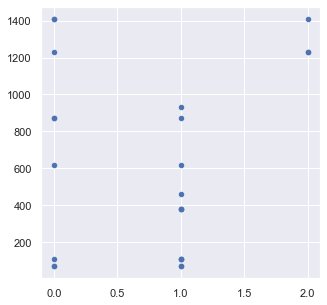

In [27]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(cookie_clusters, cookie_ptype, c='b', s=20)
plt.show()

## 두번째 군집화

In [28]:
Kmean_last = KMeans(n_clusters=4)
Kmean_last.fit(newnew_list)
kmean_center = Kmean_last.cluster_centers_
print(Kmean_last.cluster_centers_)

[[8.33333333e-01 4.73333333e+02]
 [1.00000000e+00 1.32000000e+03]
 [6.25000000e-01 9.00000000e+01]
 [5.00000000e-01 8.85000000e+02]]


In [29]:
# 레이블 값 뽑아내기
kmean_lab = Kmean_last.labels_

In [30]:
# 레이블이 합쳐진 새로운 그래프
for i in range(len(newnew_list)):
    newnew_list[i].append(kmean_lab[i])

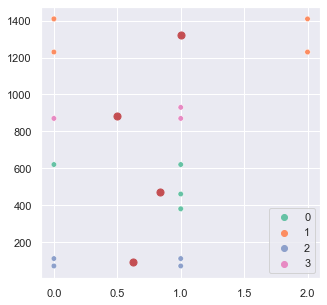

In [31]:
sns.scatterplot(x= cookie_clusters, y= cookie_ptype, hue = kmean_lab, s = 30, palette="Set2");
plt.scatter(kmean_center[0][0], kmean_center[0][1], c='r', s=50)
plt.scatter(kmean_center[1][0], kmean_center[1][1], c='r', s=50)
plt.scatter(kmean_center[2][0], kmean_center[2][1], c='r', s=50)
plt.scatter(kmean_center[3][0], kmean_center[3][1], c='r', s=50)
# plt.scatter(1.375, 625.8333333333334, c='b', s=100)

## 데이터들의 중심점 찾기

In [32]:
x = 0
y = 0
for i in range(len(newnew_list)):
    x += newnew_list[i][0]
    y += newnew_list[i][1]

In [33]:
center_x = x / len(newnew_list)
center_y = y / len(newnew_list)

In [34]:
pca = []
pca_x = []
pca_y = []
for i in range(len(newnew_list)):
    px = newnew_list[i][0] - center_x
    py = newnew_list[i][1] - center_y
    pca.append([px, py])
    pca_x.append(px)
    pca_y.append(py)

## 중심점과 cluster의 center를 포함한 그래프 그리기
- 중심점을 원점으로 이동시킨다음

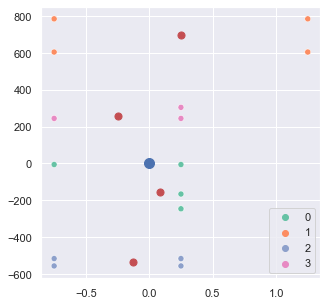

In [35]:
sns.scatterplot(x= pca_x, y= pca_y, hue = kmean_lab, palette="Set2");
plt.scatter(kmean_center[0][0] - center_x, kmean_center[0][1] - center_y, c='r', s=50)
plt.scatter(kmean_center[1][0] - center_x, kmean_center[1][1] - center_y, c='r', s=50)
plt.scatter(kmean_center[2][0] - center_x, kmean_center[2][1] - center_y, c='r', s=50)
plt.scatter(kmean_center[3][0] - center_x, kmean_center[3][1] - center_y, c='r', s=50)
plt.scatter(0, 0, c='b', s=100)

## 주성분분석법 PCA

In [36]:
from sklearn.decomposition import PCA
PC = PCA(n_components=1) # 주성분을 몇개로 할지 결정
printcipalComponents = PC.fit_transform(pca)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['new_cookie_idx'])
# 주성분으로 이루어진 데이터 프레임 구성

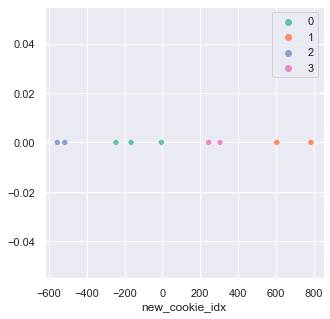

In [37]:
sns.scatterplot(x= principalDf["new_cookie_idx"], y = [0 for _ in range(len(principalDf))], hue = kmean_lab, palette="Set2");

## PCA 후 정규화

In [38]:
norm_pca = []
for i in principalDf["new_cookie_idx"]:
    abc = (i - min(principalDf["new_cookie_idx"])) / (max(principalDf["new_cookie_idx"])  - min(principalDf["new_cookie_idx"]))
    new_values = abc * 1000
    norm_pca.append(new_values)
    print(new_values)

29.850738752455214
1.6968180703561486e-13
410.4476578462554
865.6714238211931
0.0001258963798440112
865.6716756139529
597.0147750490987
231.3433512279056
29.850864648834804
29.850864648834804
999.9997482072405
1000.0
597.0149009454786
641.791009074161
0.0
231.3433512279056
231.3433512279056
999.9997482072405
410.4477837426352
865.6716756139529
29.850864648834804
597.0147750490987
0.0001258963798440112
291.0448287328155


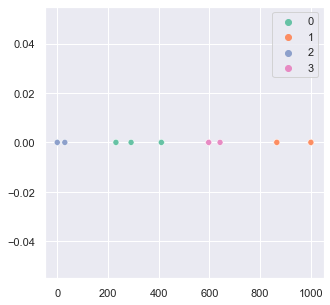

In [39]:
sns.scatterplot(x= norm_pca, y = [0 for _ in range(len(norm_pca))], hue = kmean_lab, palette="Set2");

In [40]:
updated_last_cookie_idx = {}
cnt = 0
for key in akey:
    updated_last_cookie_idx[key] = norm_pca[cnt]
    cnt += 1

In [41]:
for key in akey:
    if updated_last_cookie_idx[key] <= 1000 and updated_last_cookie_idx[key] >= 0:
        print("%s 쿠키의 새로운 인덱스 값은 :: %d"  %(cook_ordinary_idx[key], updated_last_cookie_idx[key]))

아보카도맛쿠키 쿠키의 새로운 인덱스 값은 :: 29
용감한쿠키 쿠키의 새로운 인덱스 값은 :: 0
칠리맛쿠키 쿠키의 새로운 인덱스 값은 :: 410
커스타드3세맛쿠키 쿠키의 새로운 인덱스 값은 :: 865
다크초코맛쿠키 쿠키의 새로운 인덱스 값은 :: 0
허브맛쿠키 쿠키의 새로운 인덱스 값은 :: 865
정글전사쿠키 쿠키의 새로운 인덱스 값은 :: 597
감초맛쿠키 쿠키의 새로운 인덱스 값은 :: 231
마들렌맛쿠키 쿠키의 새로운 인덱스 값은 :: 29
우유맛쿠키 쿠키의 새로운 인덱스 값은 :: 29
민트초코맛쿠키 쿠키의 새로운 인덱스 값은 :: 999
석류맛쿠키 쿠키의 새로운 인덱스 값은 :: 1000
호밀맛쿠키 쿠키의 새로운 인덱스 값은 :: 597
뱀파이어맛쿠키 쿠키의 새로운 인덱스 값은 :: 641
웨어울프맛쿠키 쿠키의 새로운 인덱스 값은 :: 0
에스프레소맛쿠키 쿠키의 새로운 인덱스 값은 :: 231
라떼맛쿠키 쿠키의 새로운 인덱스 값은 :: 231
아몬드맛쿠키 쿠키의 새로운 인덱스 값은 :: 999
블랙레이즌맛쿠키 쿠키의 새로운 인덱스 값은 :: 410
퓨어바닐라쿠키 쿠키의 새로운 인덱스 값은 :: 865
딸기크레페맛쿠키 쿠키의 새로운 인덱스 값은 :: 29
페스츄리맛쿠키 쿠키의 새로운 인덱스 값은 :: 597
벨벳케이크맛쿠키 쿠키의 새로운 인덱스 값은 :: 0
바다요정쿠키 쿠키의 새로운 인덱스 값은 :: 291


In [42]:
sec_d_norm = [[a, 0] for a in norm_pca]
last = KMeans(n_clusters = 4)
last.fit(sec_d_norm)

KMeans(n_clusters=4)

In [43]:
sec_d_norm_with_center = []
print(sec_d_norm)

[[29.850738752455214, 0], [1.6968180703561486e-13, 0], [410.4476578462554, 0], [865.6714238211931, 0], [0.0001258963798440112, 0], [865.6716756139529, 0], [597.0147750490987, 0], [231.3433512279056, 0], [29.850864648834804, 0], [29.850864648834804, 0], [999.9997482072405, 0], [1000.0, 0], [597.0149009454786, 0], [641.791009074161, 0], [0.0, 0], [231.3433512279056, 0], [231.3433512279056, 0], [999.9997482072405, 0], [410.4477837426352, 0], [865.6716756139529, 0], [29.850864648834804, 0], [597.0147750490987, 0], [0.0001258963798440112, 0], [291.0448287328155, 0]]


In [44]:
center_point_last = last.cluster_centers_

sec_d_norm_with_center = []
sec_d_norm_with_center = sec_d_norm.copy()
for i in range(len(last.labels_)):
    sec_d_norm_with_center[i].append(last.labels_[i])

print(sec_d_norm_with_center)

[[29.850738752455214, 0, 1], [1.6968180703561486e-13, 0, 1], [410.4476578462554, 0, 2], [865.6714238211931, 0, 0], [0.0001258963798440112, 0, 1], [865.6716756139529, 0, 0], [597.0147750490987, 0, 3], [231.3433512279056, 0, 2], [29.850864648834804, 0, 1], [29.850864648834804, 0, 1], [999.9997482072405, 0, 0], [1000.0, 0, 0], [597.0149009454786, 0, 3], [641.791009074161, 0, 3], [0.0, 0, 1], [231.3433512279056, 0, 2], [231.3433512279056, 0, 2], [999.9997482072405, 0, 0], [410.4477837426352, 0, 2], [865.6716756139529, 0, 0], [29.850864648834804, 0, 1], [597.0147750490987, 0, 3], [0.0001258963798440112, 0, 1], [291.0448287328155, 0, 2]]


In [45]:
center_values = [a[0] for a in center_point_last]
print(center_values)

[932.8357119105967, 14.925448061464976, 300.9950540009038, 608.2088650294593]


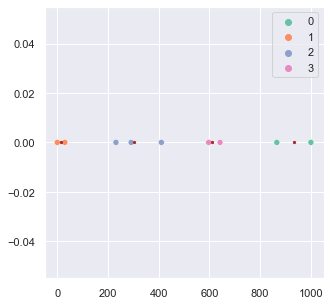

In [46]:
sns.scatterplot(x= norm_pca, y = [0 for _ in range(len(norm_pca))], hue = last.labels_, palette="Set2")
plt.scatter(x = [a[0] for a in center_point_last], y = [b[1] for b in center_point_last], c = 'brown', s = 5)

In [47]:
sec_d_norm_with_center = [[nums[0], nums[2]] for nums in sec_d_norm_with_center]

In [48]:
print(sec_d_norm_with_center)

[[29.850738752455214, 1], [1.6968180703561486e-13, 1], [410.4476578462554, 2], [865.6714238211931, 0], [0.0001258963798440112, 1], [865.6716756139529, 0], [597.0147750490987, 3], [231.3433512279056, 2], [29.850864648834804, 1], [29.850864648834804, 1], [999.9997482072405, 0], [1000.0, 0], [597.0149009454786, 3], [641.791009074161, 3], [0.0, 1], [231.3433512279056, 2], [231.3433512279056, 2], [999.9997482072405, 0], [410.4477837426352, 2], [865.6716756139529, 0], [29.850864648834804, 1], [597.0147750490987, 3], [0.0001258963798440112, 1], [291.0448287328155, 2]]


In [49]:
new_sec_with_center_and_idx = []

In [50]:
cnt = 0
for key in akey:
        new_sec_with_center_and_idx.append([key, sec_d_norm_with_center[cnt][0], sec_d_norm_with_center[cnt][1]])
        cnt += 1

In [51]:
new_sec_with_center_and_idx

[[3, 29.850738752455214, 1],
 [6, 1.6968180703561486e-13, 1],
 [10, 410.4476578462554, 2],
 [12, 865.6714238211931, 0],
 [13, 0.0001258963798440112, 1],
 [15, 865.6716756139529, 0],
 [16, 597.0147750490987, 3],
 [17, 231.3433512279056, 2],
 [18, 29.850864648834804, 1],
 [20, 29.850864648834804, 1],
 [21, 999.9997482072405, 0],
 [28, 1000.0, 0],
 [30, 597.0149009454786, 3],
 [35, 641.791009074161, 3],
 [36, 0.0, 1],
 [37, 231.3433512279056, 2],
 [39, 231.3433512279056, 2],
 [41, 999.9997482072405, 0],
 [42, 410.4477837426352, 2],
 [43, 865.6716756139529, 0],
 [44, 29.850864648834804, 1],
 [45, 597.0147750490987, 3],
 [48, 0.0001258963798440112, 1],
 [49, 291.0448287328155, 2]]

## 정해진 센터 값을 바탕으로 인덱스 재설정
1. 정해진 센터값을 정수 단위로 반올림, 이 값이 각 레이블의 인덱스 시작 지점이됨
2. 각 인덱스간의 차이의 평균을 계산 == avg
3. avg를 (전체 길이 / 4)의 값으로 나눔 == idx_cnt
4. 시작 인덱스부터 idx_cnt의 배수를 더해나가며 새로운 인덱스 생성

In [52]:
def makeStartPosAndIncrement(original_idx, center_val):
    label = [a[2] for a in original_idx]
    idx_start_values = [round(a) for a in center_val]
    idx_start_values.sort()
#     print(idx_start_values)
    
    diff = 0
    for num in range(len(idx_start_values) - 1):
        diff += (idx_start_values[num + 1] - idx_start_values[num])

    diff = round(diff / 3)
    
    sum = 0
    # 클러스터의 갯수에 따라 n 값 변경해야함
    n = 4
    for i in range(n):
        sum += label.count(i)
    
    sum /= n
    
    last_increment = (diff / sum) / 10

    return idx_start_values, last_increment

In [53]:
def changeIndex(original_idx, center_val):
    cookie_idx = [a[0] for a in original_idx]
    changed_idx = []
    label = [a[2] for a in original_idx]
    
    idx_start, increment = makeStartPosAndIncrement(original_idx, center_val)
    
    dic = {}
    a = b = c = d = 0
    for i in range(len(original_idx)):
        if label[i] == 0:
            dic[cookie_idx[i]] = round(idx_start[0] + (increment * a))
            changed_idx.append(round(idx_start[0] + (increment * a)))
            a += 1
            
        elif label[i] == 1:
            dic[cookie_idx[i]] = round(idx_start[1] + (increment * b))
            changed_idx.append(round(idx_start[1] + (increment * b)))
            b += 1
            
        elif label[i] == 2:
            dic[cookie_idx[i]] = round(idx_start[2] + (increment * c))
            changed_idx.append(round(idx_start[2] + (increment * c)))
            c += 1
            
        else:
            dic[cookie_idx[i]] = round(idx_start[3] + (increment * d))
            changed_idx.append(round(idx_start[3] + (increment * d)))
            d += 1

        
    return changed_idx, dic

In [54]:
real_cookie_idx, real_cookie_idx_dic = changeIndex(new_sec_with_center_and_idx, center_values)

print(real_cookie_idx)

[301, 306, 608, 15, 311, 20, 933, 613, 316, 321, 25, 30, 938, 943, 326, 618, 623, 35, 628, 40, 332, 948, 337, 634]


In [55]:
for key in akey:
    print(cook_ordinary_idx[key])
    print(real_cookie_idx_dic[key])

아보카도맛쿠키
301
용감한쿠키
306
칠리맛쿠키
608
커스타드3세맛쿠키
15
다크초코맛쿠키
311
허브맛쿠키
20
정글전사쿠키
933
감초맛쿠키
613
마들렌맛쿠키
316
우유맛쿠키
321
민트초코맛쿠키
25
석류맛쿠키
30
호밀맛쿠키
938
뱀파이어맛쿠키
943
웨어울프맛쿠키
326
에스프레소맛쿠키
618
라떼맛쿠키
623
아몬드맛쿠키
35
블랙레이즌맛쿠키
628
퓨어바닐라쿠키
40
딸기크레페맛쿠키
332
페스츄리맛쿠키
948
벨벳케이크맛쿠키
337
바다요정쿠키
634


In [56]:
real_cookie_idx_dic

{3: 301,
 6: 306,
 10: 608,
 12: 15,
 13: 311,
 15: 20,
 16: 933,
 17: 613,
 18: 316,
 20: 321,
 21: 25,
 28: 30,
 30: 938,
 35: 943,
 36: 326,
 37: 618,
 39: 623,
 41: 35,
 42: 628,
 43: 40,
 44: 332,
 45: 948,
 48: 337,
 49: 634}

In [57]:
# 새로운 인덱스로 바꿔주는 부분
to_new = []
for i in range(1,51):
    try:
        a = real_cookie_idx_dic[i]
    except:
        a = 0
    
    to_new.append(a)

In [1]:
dq = {3: 301,
 6: 306,
 10: 608,
 12: 15,
 13: 311,
 15: 20,
 16: 933,
 17: 613,
 18: 316,
 20: 321,
 21: 25,
 28: 30,
 30: 938,
 35: 943,
 36: 326,
 37: 618,
 39: 623,
 41: 35,
 42: 628,
 43: 40,
 44: 332,
 45: 948,
 48: 337,
 49: 634}

## 데이터 기반 쿠키 인덱스 재설정 결과

In [4]:
for i in range(1,51):
    try:
        dq[i]
        print("%s => 인덱스 \"%d\"에서 \"%d\"로 변경 " %(cook_ordinary_idx[i], i, dq[i]))
    except:
        print("", end = "")

아보카도맛쿠키 => 인덱스 "3"에서 "301"로 변경 
용감한쿠키 => 인덱스 "6"에서 "306"로 변경 
칠리맛쿠키 => 인덱스 "10"에서 "608"로 변경 
커스타드3세맛쿠키 => 인덱스 "12"에서 "15"로 변경 
다크초코맛쿠키 => 인덱스 "13"에서 "311"로 변경 
허브맛쿠키 => 인덱스 "15"에서 "20"로 변경 
정글전사쿠키 => 인덱스 "16"에서 "933"로 변경 
감초맛쿠키 => 인덱스 "17"에서 "613"로 변경 
마들렌맛쿠키 => 인덱스 "18"에서 "316"로 변경 
우유맛쿠키 => 인덱스 "20"에서 "321"로 변경 
민트초코맛쿠키 => 인덱스 "21"에서 "25"로 변경 
석류맛쿠키 => 인덱스 "28"에서 "30"로 변경 
호밀맛쿠키 => 인덱스 "30"에서 "938"로 변경 
뱀파이어맛쿠키 => 인덱스 "35"에서 "943"로 변경 
웨어울프맛쿠키 => 인덱스 "36"에서 "326"로 변경 
에스프레소맛쿠키 => 인덱스 "37"에서 "618"로 변경 
라떼맛쿠키 => 인덱스 "39"에서 "623"로 변경 
아몬드맛쿠키 => 인덱스 "41"에서 "35"로 변경 
블랙레이즌맛쿠키 => 인덱스 "42"에서 "628"로 변경 
퓨어바닐라쿠키 => 인덱스 "43"에서 "40"로 변경 
딸기크레페맛쿠키 => 인덱스 "44"에서 "332"로 변경 
페스츄리맛쿠키 => 인덱스 "45"에서 "948"로 변경 
벨벳케이크맛쿠키 => 인덱스 "48"에서 "337"로 변경 
바다요정쿠키 => 인덱스 "49"에서 "634"로 변경 


# 쿠키 티어(등급) 선정
- 자신이 가진 기존 특성을 잘 수행할 경우 높은 점수를 가지도록 설계
- ex) 마법형 -> 데미지를 많이 줄수록, 받은 피해량이 적을수록 높은 점수를 받도록 설정

![티어 선정 공식](rank_table.png)

In [16]:
cookies = []
rank_points = []

for i in range(1, 51):
    type_name = cook_pos_type[i][0]
    if type_name == "마법형" or type_name == "침투형" or type_name == "폭발형" or type_name == "사격형":
        try:
            point = ((final_avg_battle_result[i][0] * 0.75) + (final_avg_battle_result[i][1] * 0.4)
            + (final_avg_battle_result[i][0] * 0) + (final_avg_battle_result[i][0] * 0.5)) * (to_count[i] / len(temp))
            print("쿠키 :: %s | 점수 :: %d | 픽률 :: %f" % (cook_ordinary_idx[i], point, (to_count[i] / len(temp)) * 100))
            cookies.append(cook_ordinary_idx[i])
            rank_points.append(point)
        except:
            print("else")
    elif type_name == "돌격형" or type_name == "방어형":
        try:
            point = ((final_avg_battle_result[i][0] * 0.55) + (final_avg_battle_result[i][1] * 0.6)
            + (final_avg_battle_result[i][0] * 0) + (final_avg_battle_result[i][0] * 0.5)) * (to_count[i] / len(temp))
            print("쿠키 :: %s | 점수 :: %d | 픽률 :: %f" % (cook_ordinary_idx[i], point, (to_count[i] / len(temp)) * 100))
            cookies.append(cook_ordinary_idx[i])
            rank_points.append(point)
        except:
            print("else")
    elif type_name == "지원형":
        try:
            point = ((final_avg_battle_result[i][0] * 0.35) + (final_avg_battle_result[i][1] * 0.4)
            + (final_avg_battle_result[i][0] * 0.75) + (final_avg_battle_result[i][0] * 0.5)) * (to_count[i] / len(temp))
            print("쿠키 :: %s | 점수 :: %d | 픽률 :: %f" % (cook_ordinary_idx[i], point, (to_count[i] / len(temp)) * 100))
            cookies.append(cook_ordinary_idx[i])
            rank_points.append(point)
        except:
            print("else")
    elif type_name == "회복형":
        try:
            point = ((final_avg_battle_result[i][0] * 0.0) + (final_avg_battle_result[i][1] * 0.4)
            + (final_avg_battle_result[i][0] * 0.9) + (final_avg_battle_result[i][0] * 0.5)) * (to_count[i] / len(temp))
            print("쿠키 :: %s | 점수 :: %d | 픽률 :: %f" % (cook_ordinary_idx[i], point, (to_count[i] / len(temp)) * 100))
            cookies.append(cook_ordinary_idx[i])
            rank_points.append(point)
        except:
            print("else")

else
쿠키 :: 천사맛쿠키 | 점수 :: 3 | 픽률 :: 0.016111
else
쿠키 :: 비트맛쿠키 | 점수 :: 39 | 픽률 :: 0.225552
쿠키 :: 블랙베리맛쿠키 | 점수 :: 4 | 픽률 :: 0.016111
쿠키 :: 용감한쿠키 | 점수 :: 658 | 픽률 :: 0.789431
else
else
쿠키 :: 체리맛쿠키 | 점수 :: 14 | 픽률 :: 0.112776
쿠키 :: 칠리맛쿠키 | 점수 :: 69 | 픽률 :: 0.064443
else
쿠키 :: 커스타드3세맛쿠키 | 점수 :: 22 | 픽률 :: 0.386660
쿠키 :: 다크초코맛쿠키 | 점수 :: 23868 | 픽률 :: 8.313195
쿠키 :: 탐험가맛쿠키 | 점수 :: 66 | 픽률 :: 0.048333
쿠키 :: 허브맛쿠키 | 점수 :: 4365 | 픽률 :: 8.200419
쿠키 :: 정글전사쿠키 | 점수 :: 858 | 픽률 :: 2.706622
쿠키 :: 감초맛쿠키 | 점수 :: 3858 | 픽률 :: 2.078299
쿠키 :: 마들렌맛쿠키 | 점수 :: 344 | 픽률 :: 0.225552
쿠키 :: 마법사맛쿠키 | 점수 :: 3 | 픽률 :: 0.016111
쿠키 :: 우유맛쿠키 | 점수 :: 359 | 픽률 :: 0.241663
쿠키 :: 민트초코맛쿠키 | 점수 :: 20 | 픽률 :: 0.032222
쿠키 :: 근육맛쿠키 | 점수 :: 8 | 픽률 :: 0.016111
쿠키 :: 용사맛쿠키 | 점수 :: 18 | 픽률 :: 0.016111
else
else
쿠키 :: 팬케이크맛쿠키 | 점수 :: 5 | 픽률 :: 0.016111
쿠키 :: 독버섯맛쿠키 | 점수 :: 341 | 픽률 :: 0.064443
쿠키 :: 석류맛쿠키 | 점수 :: 1684 | 픽률 :: 5.284356
쿠키 :: 공주맛쿠키 | 점수 :: 18 | 픽률 :: 0.048333
쿠키 :: 호밀맛쿠키 | 점수 :: 5626 | 픽률 :: 2.916063
쿠키 :: 눈설탕맛쿠키 | 점수

In [18]:
idx_set = []
aaasss = rank_points.copy()

for _ in aaasss:
    ma = max(rank_points)
    print(ma)
    idx_set.append(aaasss.index(ma))
    rank_points.remove(ma)

39179.9654341872
25573.31743998711
23868.495722571286
21099.312880618658
11152.369985500241
5626.441880135331
4365.236861607862
3858.3417029160623
3251.680231996133
1996.082624456259
1684.3867891090704
858.588529080071
833.2641211535364
658.7319961333978
359.8774287095215
344.371991300145
341.6990655711294
73.55911068148863
69.58997100048333
66.93854519091349
66.33985016916384
43.82230546157565
39.424407926534556
22.74316094731755
20.069663283389723
18.869091348477525
18.253334944417592
16.884372482680845
14.806694055099081
14.366747220879653
8.627211213146447
8.358699855002417
6.614427259545673
5.578475914290318
5.498759465120027
4.31379088126309
3.9365877235379414
3.7409376510391494
3.4327694538424365
2.5237957145158694


## 쿠키 등급 선정 결과

In [20]:
for i in idx_set:
    print(cookies[i])

에스프레소맛쿠키
뱀파이어맛쿠키
다크초코맛쿠키
라떼맛쿠키
블랙레이즌맛쿠키
호밀맛쿠키
허브맛쿠키
감초맛쿠키
퓨어바닐라쿠키
딸기크레페맛쿠키
석류맛쿠키
정글전사쿠키
아몬드맛쿠키
용감한쿠키
우유맛쿠키
마들렌맛쿠키
독버섯맛쿠키
페스츄리맛쿠키
칠리맛쿠키
벨벳케이크맛쿠키
탐험가맛쿠키
구미호맛쿠키
비트맛쿠키
커스타드3세맛쿠키
민트초코맛쿠키
용사맛쿠키
공주맛쿠키
눈설탕맛쿠키
자색고구마쿠키
체리맛쿠키
웨어울프맛쿠키
근육맛쿠키
딸기맛쿠키
슈크림맛쿠키
팬케이크맛쿠키
블랙베리맛쿠키
마법사맛쿠키
스파클링맛쿠키
천사맛쿠키
무화과맛쿠키


## 번외 K-Means로 예측

In [117]:
match_k = ["a", "b", "c", "d", "e", "f"]
cnt = 0
alpha = 0
all_of_the_combinations = []

while (1):
    cnt += 1
    try:
        key = match_k[alpha] + str(cnt)
    except:
        break
        
    newnew = temp[temp["MATCH_KEY"] == key]
    newnew = newnew[newnew["TEAM"] == "df"]
    newnew = newnew["COOKIE_IDX"]

    abc = []
    if newnew.empty:
        cnt = 0
        alpha += 1
    else:
        for a in newnew:
            abc.append(a)
        
        all_of_the_combinations.append(abc)

In [141]:
all_of_the_combinations[0]

[13, 37, 17, 15, 35]

In [142]:
all_of_the_combinations[0][:2] + all_of_the_combinations[0][4:]

[13, 37, 35]

In [149]:
want_to_find = [6, 0, 0, 43, 16]

In [150]:
a = []
for i in range(len(want_to_find)):
    if want_to_find[i] == 0:
        a.append(i)
    else:
        print(to_new[want_to_find[i] - 1])
        print(cook_ordinary_idx[want_to_find[i]])

306
용감한쿠키
40
퓨어바닐라쿠키
933
정글전사쿠키


In [151]:
to_test = copy.deepcopy(all_of_the_combinations)
for k in range(len(to_test)):
    for i in range(len(to_test[k])):
        if i == a[0] or i == a[1]:
            to_test[k][i] = 0

In [152]:
to_test

[[13, 0, 0, 15, 35],
 [13, 0, 0, 15, 30],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 17, 35],
 [13, 0, 0, 15, 28],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 16],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 28],
 [6, 0, 0, 16, 41],
 [13, 0, 0, 37, 15],
 [13, 0, 0, 15, 43],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 43, 35],
 [42, 0, 0, 15, 28],
 [13, 0, 0, 43, 30],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 30, 41],
 [13, 0, 0, 28, 35],
 [13, 0, 0, 15, 28],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 15, 35],
 [6, 0, 0, 16, 41],
 [13, 0, 0, 15, 35],
 [13, 0, 0, 30, 35],
 [39, 0, 0, 30, 35],
 [13, 0, 0, 43, 35],
 [13, 0, 0, 28, 35],
 [13, 0, 0, 30, 35],
 [13, 0, 0, 30, 35],
 [13, 0, 0, 15,

In [155]:
for a in range(len(to_test)):
    try:
        to_test[a].remove(0)
    except:
        continue

In [159]:
to_kmeans = []
for a in to_test:
    if len(a) == 3:
        to_kmeans.append(a)

In [160]:
# 군집의 갯수 3
Kmean = KMeans(n_clusters=10)
Kmean.fit(to_kmeans)

KMeans(n_clusters=10)

In [161]:
# 군집의 중심 좌표
center_point_battle_result = Kmean.cluster_centers_
print(center_point_battle_result)

[[13.1328125  15.00390625 33.30859375]
 [13.11553785 42.37848606 35.74900398]
 [43.616      42.208      36.8       ]
 [42.71       21.29       39.47      ]
 [12.62658228 29.85443038 37.48734177]
 [12.31818182 15.36363636 13.18181818]
 [11.34285714 36.92857143 15.11428571]
 [40.33333333 13.66666667 17.61538462]
 [40.125      36.21875    14.625     ]
 [ 9.40650407 15.87804878 42.00813008]]


In [ ]:
# 데이터에 군집 레이블 값을 추가
result_by_sklearn = new_avg.copy()
for i in range(len(result_by_sklearn)):
    result_by_sklearn[i].append(Kmean.labels_[i])

In [165]:
xxx = [a[0] for a in to_kmeans]
yyy = [a[1] for a in to_kmeans]
zzz = [a[2] for a in to_kmeans]

In [180]:
%matplotlib notebook

<IPython.core.display.Javascript object>


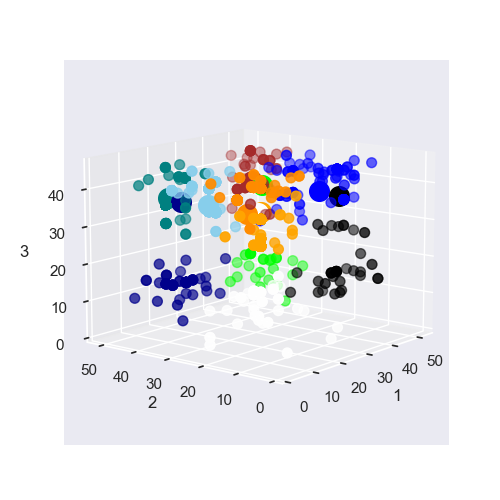

In [182]:
plt.rcParams["figure.figsize"] = (5, 5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")
ax.set_xlabel("1")
ax.set_ylabel("2")
ax.set_zlabel("3")

colors = ['orange', 'teal', 'brown', 'blue', 'skyblue', 'white', 'darkblue', 'black', 'lime','darkorange', 'darkgreen']
# np.where(condition, [x,y])
#                  condition_1.  , [ x  ,                y                             ]
col = np.where(Kmean.labels_ == 0, 'orange', 
               np.where(Kmean.labels_ == 1, 'teal', 
                        np.where(Kmean.labels_ == 2, 'brown', 
                                 np.where(Kmean.labels_ == 3, 'blue', 
                                          np.where(Kmean.labels_ == 4, 'skyblue', 
                                                   np.where(Kmean.labels_ == 5, 'white', 
                                                            np.where(Kmean.labels_ == 6, 'darkblue', 
                                                                     np.where(Kmean.labels_ == 7, 'black', 
                                                                              np.where(Kmean.labels_ == 8, 'lime', 
                                                                                       np.where(Kmean.labels_ == 9, 'darkorange', 'darkgreen'))))))))))

ax.scatter(xxx, yyy, zzz, c = col, s = 50)

for i in range(len(center_point_battle_result)):
    ax.scatter(center_point_battle_result[i][0], center_point_battle_result[i][1], center_point_battle_result[2][2], c = colors[i], marker='o', s= 200, cmap='Greens')
plt.show()

## 번외 KNN으로 예측

In [204]:
match_keys = temp['MATCH_KEY']
cookiees = temp['COOKIE_IDX']
teams = temp['TEAM']

In [205]:
team_pd = pd.DataFrame(teams)

In [206]:
cookie_pd = pd.DataFrame(cookiees)

In [207]:
match_key_pd = pd.DataFrame(match_keys)

In [208]:
a = pd.merge(match_key_pd, team_pd, how = 'left', left_index = True, right_index = True)

In [209]:
a

,MATCH_KEY,TEAM
0,a1,at
1,a1,at
2,a1,at
3,a1,at
4,a1,at
...,...,...
12457,f222,df
12458,f222,df
12459,f222,df
12460,f222,df


In [210]:
save_data = pd.merge(a, cookie_pd, how = 'left', left_index = True, right_index = True)

In [211]:
save_data

,MATCH_KEY,TEAM,COOKIE_IDX
0,a1,at,13
1,a1,at,39
2,a1,at,37
3,a1,at,43
4,a1,at,35
...,...,...,...
12457,f222,df,13
12458,f222,df,37
12459,f222,df,17
12460,f222,df,15


In [212]:
ck_idx = []
all_idx = []
mc_key = save_data['MATCH_KEY'][0]

for i in range(len(save_data)):
    if save_data['MATCH_KEY'][i] == mc_key:
        if save_data['TEAM'][i] == 'df':
            ck_idx.append(save_data['COOKIE_IDX'][i])
    else:
        all_idx.append(ck_idx)
        ck_idx = []
        mc_key = save_data['MATCH_KEY'][i]
        
        if save_data['TEAM'][i] == 'df':
            ck_idx.append(save_data['COOKIE_IDX'][i])    
            

In [213]:
final_idx = []

for a in all_idx:
    if len(a) == 5:
        final_idx.append(a)

In [352]:
def calculate_distance(inp, tdt, label_idx):
    lengths = [] 
    cnt = 0
    
    
    for nums in tdt:
        add = 0
        for i in range(len(nums)):
            if i != label_idx:
                try:
                    input_val = real_cookie_idx_dic[inp[i]]
#                     input_val = inp[i]
                except:
                    print("데이터 부족으로 예측 불가")
                    return

                try:
                    train_val = real_cookie_idx_dic[nums[i]]
#                     train_val = nums[i]
                except:
#                     print("계산불가")
                    break
                    
                add += (input_val - train_val) ** 2
            
        cal_len = math.sqrt(add)
#         print(cal_len, end = " ")
        if cal_len <= 10:
            lengths.append(cnt)
        
        cnt += 1
    return lengths

In [353]:
def knn(input_data, test_data):
    label_idx = 0
    
    for i in range(len(input_data)):
        if input_data[i] == 0:
            label_idx = i
        else:
            print("조합의 %d번째 쿠키는 %s" 
                  %(i+1, cook_ordinary_idx[input_data[i]]))
#     print(label_idx)

    print('-'*50)
    print('찾아야하는 쿠키는 %d번에 위치한 쿠키입니다.' %(label_idx + 1))
    lengths = calculate_distance(input_data, test_data, label_idx)
#     print(len(lengths))
    
    find_ck_idx = [0 for i in range(50)]
#     print(len(find_ck_idx))
    # len == 50
#     print(lengths)
#     print(len(test_data))
    try:
        for i in lengths:
#             print((test_data[i][label_idx]))
            find_ck_idx[test_data[i][label_idx]] += 1
    #     print(find_ck_idx)
    except:
        print('dds')
    
    print('-'*50)
#     print(find_ck_idx)
    for i in range(len(find_ck_idx)):
        if find_ck_idx[i] != 0:
            print("예측되는 쿠키는 %f의 확률로, %s가 예측됩니다." 
                  %((find_ck_idx[i]/len(lengths))*100, cook_ordinary_idx[i]))
            print(test_data[i])
    
    

In [356]:
test = [6, 42, 0, 16, 41]

In [357]:
knn(test, final_idx)

조합의 1번째 쿠키는 용감한쿠키
조합의 2번째 쿠키는 블랙레이즌맛쿠키
조합의 4번째 쿠키는 정글전사쿠키
조합의 5번째 쿠키는 아몬드맛쿠키
--------------------------------------------------
찾아야하는 쿠키는 3번에 위치한 쿠키입니다.
dds
--------------------------------------------------
예측되는 쿠키는 0.757576의 확률로, 블랙베리맛쿠키가 예측됩니다.
예측되는 쿠키는 3.030303의 확률로, 칠리맛쿠키가 예측됩니다.
예측되는 쿠키는 3.030303의 확률로, 허브맛쿠키가 예측됩니다.
예측되는 쿠키는 12.878788의 확률로, 감초맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 마들렌맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 마법사맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 팬케이크맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 독버섯맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 석류맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 호밀맛쿠키가 예측됩니다.
예측되는 쿠키는 1.515152의 확률로, 눈설탕맛쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 뱀파이어맛쿠키가 예측됩니다.
예측되는 쿠키는 21.212121의 확률로, 에스프레소맛쿠키가 예측됩니다.
예측되는 쿠키는 2.272727의 확률로, 라떼맛쿠키가 예측됩니다.
예측되는 쿠키는 2.272727의 확률로, 블랙레이즌맛쿠키가 예측됩니다.
예측되는 쿠키는 6.818182의 확률로, 퓨어바닐라쿠키가 예측됩니다.
예측되는 쿠키는 0.757576의 확률로, 무화과맛쿠키가 예측됩니다.
